# Deep Learning mittels Keras (TensorFlow)

In dieser Übung wollen wir uns mit der Anwendung des Deep Learning Frameworks Keras, welches eine vereinfachte API zu Tensorflow darstellt, vertraut machen.
Es abstrahiert sehr viel von den dahinterliegenden Operationen vom Anwender weg, weshalb es sich sehr gut für schnelles Prototyping eignet.

Die zentralen Punkte, welche ihr aus dieser Übung mitnehmen solltet sind:
- Schnelles Prototyping mit Keras
- Wie erkenne ich Overfitting
- Visualisierung mit Tensorboard
- Beonderheit bei Anwendung auf medizinische Zeitreihen

Der erste Teil der Übung ist angelehnt an das Tensorflow Tutorial Classification.

Referenzen

[https://www.tensorflow.org/api_docs/python/tf/keras](https://www.tensorflow.org/api_docs/python/tf/keras)

[https://www.tensorflow.org/tutorials](https://www.tensorflow.org/tutorials)

[https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)

Zuerst installieren wir das wfdb modul, welches uns IO für Aufgabe 2 liefert. Danach müsst ihr die Laufzeit einmal neu starten.

In [ ]:
!pip install wfdb

Nun könne wir alle für diese Übung benötigten Module importieren.

In [ ]:
# Importiere TensorFlow (enthält tf.keras)
import tensorflow as tf

# Wie üblich
import numpy as np
import os
import wfdb
import matplotlib.pyplot as plt

## Aufgabe 1: Simpler Classifier für MNIST

MNIST ist ein sehr bekannter Standarddatensatz von Yann LeCun, welcher für die optische Zahlenerkennung erstellt wurde und 28x28 Graustufen-Bilder der Ziffern von 0-9 in verschiedenen Variationen enthält.

Wir wollen auf dieser Basis eine Zahlenerkennung bauen.

Diese Aufgabe hat 3 Teilaufgaben **a,b,c**, wobei ein Großteil des Codes bereits gegeben ist. Die Aufgabe ist vor allem dazu gedacht schnell zu Ergebnissen zu kommen und ein Gefühl für Deep Learning zu bekommen. Ausprobieren ist ausdrücklich erwünscht.

Lade den Datensatz und definiere die Klassen. Das Trainings- und Testset sind bereits definiert!

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = ['null', 'eins', 'zwei', 'drei', 'vier', 'fünf', 'sechs', 'sieben', 'acht', 'neun']

In [ ]:
print(f"Training enthält {len(train_images)} {train_images.shape[1]}x{train_images.shape[2]} Bilder")
print(f"Test enthält {len(test_images)} {test_images.shape[1]}x{test_images.shape[2]} Bilder")
print(f"Intensitäten zwischen 0 und 255!?, Datentyp {train_images.dtype}")

Zur Veranschaulichung sehen wir uns eines der Bilder an.

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

a) Normalisiere die Daten

In [ ]:
# DEIN CODE

Nun bekommen wir einen Eindruck der Verteilung der Datenpunkte:

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Greys')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

b) Nutze das Beispielmodell als Einstieg um ein eigenes Modell zu entwerfen. Es sollen die Ziffern erkannt werden, also ein Klassfikationsproblem gelöst werden.

Nutze den Modell-Container `tf.keras.Sequential` um simple Modelle zu erzeugen, bei denen automatisch aufeinanderfolgende Schichten einer Liste verknüpft werden, so dass der Ausgang der vorherigen Schicht in den Eingang der Folgeschicht geleitet wird und beide die gleiche Dimension haben.


In `tf.keras.layers` sind verschiedene Layer definiert, welch sich in der Regel einfach aneinander reihen lassen.

Probiere insbesondere die aus der Vorlesung bekannten `Dense`(linearer Layer), `MaxPool2D`,`Conv2D`, `BatchNormalization`, und `Dropout` aus. Überlege, welche Auswirkungen von den Layern ausgehen und versuche ein Netz zu finden, welches möglichst wenig "overfittet".

*Tipp:* In der letzten Schicht können wir uns die Aktivierung sparen, da wir eine Lossfunktion mit **logits** verwenden. Wie wir in der letzten Übung gesehen haben sparen wir uns durch die Zusammenlegung der Sigmoid-Aktivierung mit der Crossentropy-Loss einige Berechnungen und sind effizienter. Außerdem bieten die meisten Frameworks die Möglichkeit die Labels nicht als One-Hot Vektor sonder Integer zu übergeben.

In [ ]:
# model = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(28, 28)),
#    tf.keras.layers.Dense(10)
# ])

# DEIN CODE

In Keras wird das Modell kompiliert, bevor man es verwenden kann. Wir können dabei dem Modell gleich das Optimierungsverfahren, die loss-Funktion welche optimiert werden soll, sowie Metriken welche uns zur Evaluation dienen, definieren. Die Metriken werden in jeder Trainingsepoche berechnet und bieten einen guten Anhaltspunkt über das Konvergenzverhalten und die Performance des Modells.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Die Model-Summary gibt uns eine Zusasmmenfassung des kompilierten Netzes mit allen Layern, welche wir verwendet haben und die Anzahl der Parameter, welche direkt ein Maß für die Komplexität des Modells bieten.

In [ ]:
model.summary()

Nutze die `fit` Funktion des Modells um das Modell zu trainieren. Wenn wir Validierungsdaten mitangeben, könne wir uns in Tensorboard während des Trainings anschauen, wie gut unser Modell auf neuen, ungesehenen Daten abschneiden würde. Tensorboard ist eigentlich eine Webapp, welche sich über den Browser anzeigen lässt und über Logging Mechanismen Einblicke in Zwischenergebnisse und den allgemeinen Lernverlauf gibt. Wir verwenden es hier vorerst nur zur Anzeige der Accuracy über die Zeit. Tatsächlich kann es noch viel mehr.

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels),callbacks=tf.keras.callbacks.TensorBoard('logs/mymodel'))

Tensorboard bietet auch ein Jupyter-Plugin, sodass wir es direkt hier im Notebook anzeigen lassen können.

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%ls
%tensorboard --logdir logs/mymodel

Mit der `evaluate`-Methode können wir das Modell auf den Testdaten evaluieren

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Um die Wahrscheinlichkeiten zu bekommen (oder Unsicherheit, beides strenggenommen nicht ganz korrekt) können wir nachträglich einfach einen Softmax-Layer hinzufügen.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Wodurch zeichnen sich die Bilder aus, für die das Modell unsicher ist (p<0.9)?

In [ ]:
unsure_inds = np.argwhere(np.max(predictions,axis=1)<0.9).flatten()
print(f"Anzahl von Ziffern im Testset mit Sicherheit < 0.9 : {len(unsure_inds)} von {len(predictions)}")

In [ ]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

In [ ]:
# vordefinierte Funktionen zum Plotten

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='Greys')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# Plotte die ersten X Bilder, bei denenen sich der Klassifikator unsicher ist, die vorhergesagten und wahren Labels
# Korrekte Predictions sind Blau, falsche rot
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(unsure_inds[i], predictions[unsure_inds[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(unsure_inds[i], predictions[unsure_inds[i]], test_labels)
plt.tight_layout()
plt.show()

c) Finde ein Modell mit möglichst geringer Komplexität und hoher Performance. Wie kann man die Struktur der Daten ausnutzen?



## Erkennen von Arrythmien mit Deep Neural Networks

In der MIT-BIH Arrhythmia Database [Link](https://physionet.org/content/mitdb/1.0.0/) sind verschiedene Arrythmien des Herzens zu finden. Es handelt sich um 2-Kanal EKG Aufnahmen, welche Beat-weise annotiert sind. Das bedeutet zu jedem Herzschlag exisitiert ein von einem Arzt erstelltes Label um welche Art von Herzschlag (pathologisch/normal) es sich handelt.

Wir beschränken uns in dieser Übung auf Normaler Herzschlag, Linksschenkelblock, Rechtschenkelblock und Extrasystole (vorzeitige Erregung der Atria) ['N' , 'L' , 'R' , 'A']

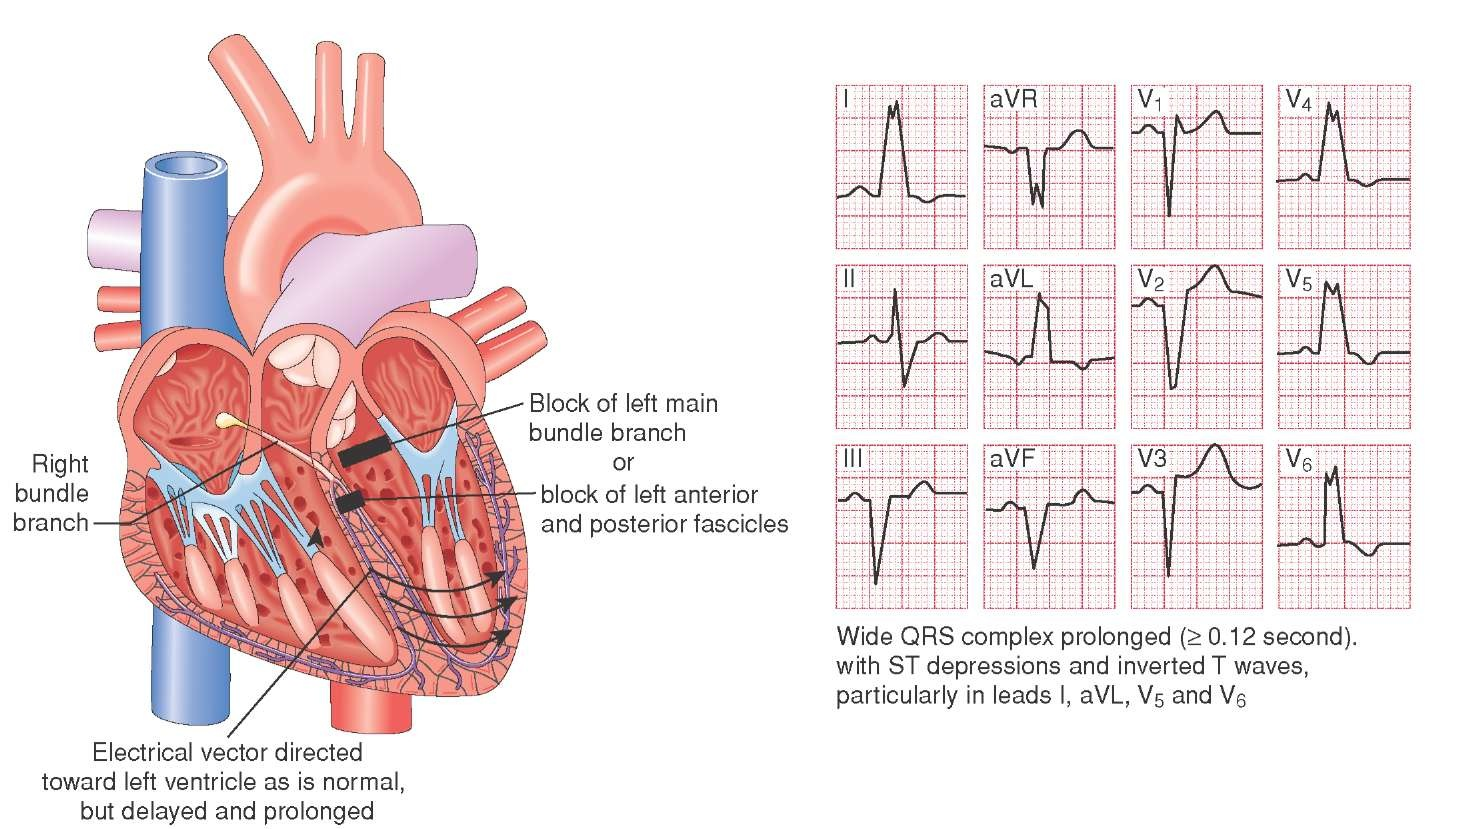

In [ ]:

# Download der Arrythmia Database
wfdb.dl_database('mitdb', os.path.join(os.getcwd(), 'mitdb'))


Es gibt zwei Reihen von Recordings (1xx,2xx):

In [ ]:
wfdb.get_record_list('mitdb')

Zuerst schauen wir uns ein Recording und die damit verbundenen Annotation der Herzschläge (Markierung der QRS Komplexe) an:

In [ ]:
record = wfdb.rdrecord('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

In [ ]:
wfdb.plot_wfdb(record, annotation = annotation,
         title='Record 100 from MIT-BIH Arrhythmia Database',
         time_units = 'seconds', figsize = (10,4), ecg_grids = 'all')

In Python lässt sich über die eingebauten Dictionaries einiges über den Inhalt von Objekten erfahren. Für die Interessierten hier der Inhalt des Recordings und der Annotation:

In [ ]:
display(record.__dict__)

In [ ]:
display(annotation.__dict__)


a) Erstelle einen eigenen Plot aus den Daten und füge die Annotation hinzu

In [ ]:
# DEIN CODE

b) In welchem Rahmen bewegt sich die Herzrate?

In [ ]:
# DEIN CODE

Mit der folgenden Funktion lässt sich ein Datensatz aus numpy-Arrays aus den wfdb Daten generieren.

In [ ]:
from scipy import stats

def create_set(patients,used_labels,draw_prob=None):
  '''
  Erzeugt ein Datensatz aus Patienten in Form einer Matrix X und eines Vektors y.

  Parameters:
  patients: Liste von relevanten mitdb Recordings
  used_labels: Liste der relevanten Labels
  draw_prob: ein ndarray mit der Wahrscheinlichkeit für jedes Label es zu ziehen (soll zum Ausgleich von Disbalance benutzt werden)

  '''
  X_list = []
  y_list = []
  used_labels_inv = {used_labels[i]: i for i in range(len(used_labels))}

  for p,pat in enumerate(patients):
    record = wfdb.rdrecord('mitdb/'+ str(pat))
    ecg = stats.zscore(record.p_signal,axis=0) #Normalize data zero mean unit variance
    annotation = wfdb.rdann('mitdb/'+str(pat), 'atr')
    for i,idx in enumerate(list(annotation.sample)):
      if idx>200 and idx<ecg.shape[0]-201:
        sample = ecg[idx-200:idx+200]
        label = annotation.symbol[i]
        if label in used_labels:
          if draw_prob is not None:
            if np.random.rand()>draw_prob[used_labels_inv[label]]:
              continue
          X_list.append(sample)
          y_list.append(used_labels_inv[label])
  X = np.stack(X_list, axis=0)
  y = np.stack(y_list, axis=0)
  return X,y

Wir geben hier die interessanten Klassen zur Klassifizierung vor: ['N' , 'L' , 'R' , 'A'].
Wir nutzen vorerst ausschließlich die Aufnahmen 1xx.

c) Erzeuge die Trainingsdaten mit Hilfe der oben definierten Funktion. Fürs spätere Training ist es von Vorteil, wenn die Klassen etwa gleichverteilt sind. Dies kann entweder mit dem Parameter `draw_prob` oder mit einer eigenen Funktion oder entsprechender Gewichtung in der Kostenfunktion gelöst werden.

Trenne die Daten in Trainings- und Testset.

In [ ]:
all_patients = wfdb.get_record_list('mitdb')
used_labels = ['N','L','R','A']

# DEIN CODE

In [ ]:
# DEIN CODE

d) Definiere ein Keras Modell, welches die Daten gut abbildet und eine gute Genauigkeit erreicht.

*Anmerkung:* Bieten sich hier Sequentielle Modelle (Vorlesung 09 NLP) an?

*Tipp:* L2-Regularisierung kann direkt zu den einzelnen Layern als Parameter hinzugefügt werden: `kernel_regularizer=regularizers.l2(0.001)` (Gewichtung = 0.001)

In [ ]:
# DEIN CODE

e) Kompiliere das Modell

In [ ]:
# DEIN CODE

f) Trainiere das Modell

In [ ]:
# DEIN CODE

g) Evaluiere das Modell. Was fällt dir auf? Vergleiche die Performance insbesondere mit der vorhergenden Aufgabe 1. Hast du die Daten ordentlich getrennt?

In [ ]:
# DEIN CODE